In [1]:
%env CUDA_VISIBLE_DEVICES=0
import torch
import pylab as plt
plt.style.use('dark_background')
import skimage.data
from torch.utils.tensorboard import SummaryWriter

env: CUDA_VISIBLE_DEVICES=0


In [2]:
class _SummaryWriter(SummaryWriter):

    def __init__(self, log_dir=None, comment='', purge_step=None, max_queue=10, flush_secs=120, filename_suffix=''):
        super(_SummaryWriter, self).__init__(log_dir, comment, purge_step, max_queue, flush_secs, filename_suffix)

    def add_hparams(self, hparam_dict, metric_dict, hparam_domain_discrete=None, run_name=None):
        from torch.utils.tensorboard.summary import hparams
        torch._C._log_api_usage_once("tensorboard.logging.add_hparams")
        if type(hparam_dict) is not dict or type(metric_dict) is not dict:
            raise TypeError('hparam_dict and metric_dict should be dictionary.')
        exp, ssi, sei = hparams(hparam_dict, metric_dict, hparam_domain_discrete)
        self.file_writer.add_summary(exp)
        self.file_writer.add_summary(ssi)
        self.file_writer.add_summary(sei)
        for k, v in metric_dict.items():
            if v is not None:
                self.add_scalar(k, v)

In [3]:
img = torch.from_numpy(skimage.data.shepp_logan_phantom()).float()
img.shape

torch.Size([400, 400])

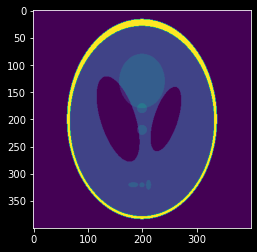

In [4]:
plt.imshow(img)
plt.show()

In [5]:
writer = _SummaryWriter(log_dir='logs/test_0', comment='rc')

In [6]:
h_params = {'This': 1, 'is': 2, 'a': 3, 'test': 4}
metrics = {'accuracy': None, 'loss': None}
writer.add_hparams(h_params, metrics)

accuracy_values = [(1, 0.6), (2, 0.8), (3, 0.9), (4, 0.95)]
loss_values = [(1, 3), (2, 1), (3, 0.5), (4, 0.11)]
for step, v in accuracy_values:
	writer.add_scalar('accuracy', v, step)
for step, v in loss_values:
	writer.add_scalar('loss', v, step)

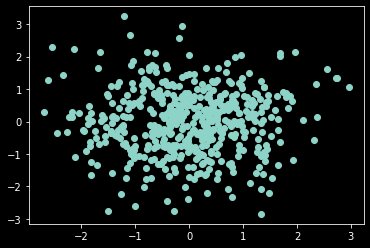

In [7]:
x = torch.randn(500)
y = torch.randn(500)
plt.scatter(x, y)
plt.show()

In [8]:
torch.vstack([x,y,torch.zeros_like(x)]).T.shape

torch.Size([500, 3])

In [9]:
writer.add_embedding(tag='mesh', mat=torch.vstack([x,y]).T, global_step=0)
writer.flush()

In [5]:
for i in range(25):
    for j in range(25):
        writer.add_scalar(tag='idx/train', scalar_value=float(j), global_step=i)

In [6]:
writer.flush()

In [7]:
writer.add_image(tag='batch0/img', img_tensor=img[None], global_step=0)
writer.flush()

In [8]:
writer.add_hparams(hparam_dict=dict(lr=1e-3, method='abc'), metric_dict={'hparam/loss':10}, run_name='test_0')
writer.flush()

In [9]:
writer.add_hparams(hparam_dict=dict(lr=1e-3, method='abc'), metric_dict={'hparam/z_loss':10}, run_name='test_1')
writer.flush()

In [10]:
writer.add_hparams(hparam_dict=dict(lr=1e-3, method='abc'), metric_dict={'loss':10}, run_name='test_2')
writer.flush()